In [72]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Importing Data

In [212]:
df = pd.read_csv('Salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [213]:
df.shape

(397, 6)

in this data 397 rows and 6 columns are present

# Checking missing values

In [233]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

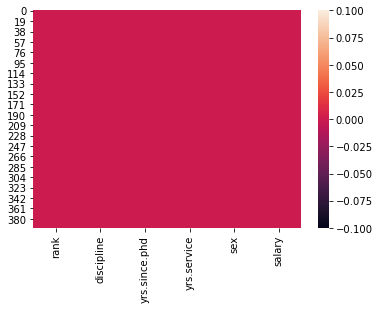

In [234]:
sns.heatmap(df.isnull())

In [214]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [218]:
df['salary'].unique()

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225, 155750,  86373, 125196, 100938, 146500,  93418,
       101299, 231545,  94384, 114778,  98193, 151768, 140096,  70768,
       126621, 108875,  74692, 106639, 103760,  83900, 117704,  90215,
       100135,  75044,  90304,  75243, 109785, 103613,  68404, 100522,
        99418, 111512,  91412, 126320, 146856, 100131,  92391, 113398,
        73266, 150480, 193000,  86100,  84240, 150743, 135585, 144640,
        88825, 122960, 132825, 152708,  88400, 172272, 107008,  97032,
       105128, 105631, 166024, 123683,  84000,  95611, 129676, 102235,
       106689, 133217, 126933, 153303, 127512,  83850, 113543,  82099,
        82600,  81500, 131205, 112429,  82100,  72500, 104279, 105000,
      

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Plotting Outliers & Removing

<AxesSubplot:xlabel='yrs.service'>

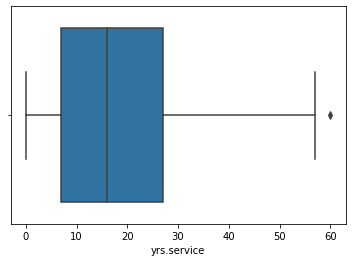

In [221]:
sns.boxplot(df['yrs.service'])

In [222]:
def remove_outliers_yrs_service(df):
    IQR = df['yrs.service'].quantile(0.75) - df['yrs.service'].quantile(0.25)
    
    lower_range = df['yrs.service'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['yrs.service'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['yrs.service'] <=lower_range, 'yrs.service'] = lower_range
    df.loc[df['yrs.service'] >= upper_range, 'yrs.service'] = upper_range

In [226]:
remove_outliers_yrs_service(df)

<AxesSubplot:xlabel='yrs.service'>

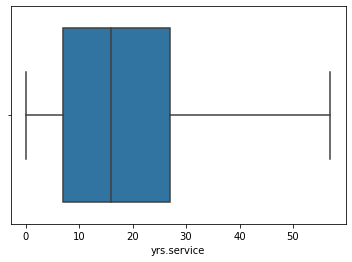

In [228]:
sns.boxplot(df['yrs.service'])

<AxesSubplot:xlabel='salary'>

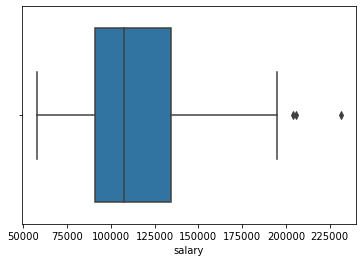

In [229]:
sns.boxplot(df['salary'])

In [230]:
def remove_outliers_salary(df):
    IQR = df['salary'].quantile(0.75) - df['salary'].quantile(0.25)
    
    lower_range = df['salary'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['salary'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['salary'] <=lower_range, 'salary'] = lower_range
    df.loc[df['salary'] >= upper_range, 'salary'] = upper_range

In [231]:
remove_outliers_salary(df)

<AxesSubplot:xlabel='salary'>

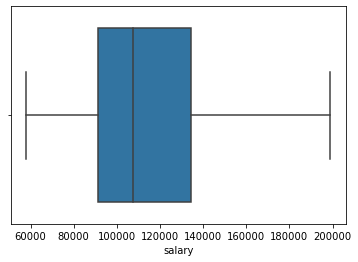

In [232]:
sns.boxplot(df['salary'])

# Checking correlation between attributes

<AxesSubplot:>

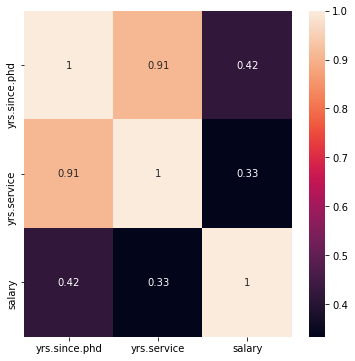

In [236]:
plt.figure(figsize=(6,6))
corr = df.corr()
sns.heatmap(corr,annot=True)

# Feature Engineering 

In [240]:
def feature_engineering(df):
    df['sex'] = np.where(df['sex'] == 'Male',1,0)
    
    rank = {value: key for key, value in enumerate(df['rank'].unique())}
    df['rank'] = df['rank'].map(rank)
    
    decipline = {value: key for key, value in enumerate(df['discipline'].unique())}
    df['discipline'] = df['discipline'].map(rank)
    
    return df

In [241]:
df = feature_engineering(df)

# After doing feature engineering

In [263]:
df.drop(['discipline'],axis=1,inplace=True)

In [264]:
df.head()

,rank,yrs.since.phd,yrs.service,sex,salary
0,0,19,18.0,0,139750.0
1,0,20,16.0,0,173200.0
2,1,4,3.0,0,79750.0
3,0,45,39.0,0,115000.0
4,0,40,41.0,0,141500.0


# Scaling

In [265]:
from sklearn.preprocessing import StandardScaler

In [266]:
sc = StandardScaler()

In [268]:
x = df[['rank','yrs.since.phd','yrs.service','sex']]

In [269]:
y = df['salary']

In [270]:
y.value_counts()

92000.0     5
74000.0     4
72500.0     4
198962.5    3
101000.0    3
           ..
109646.0    1
186960.0    1
96545.0     1
111512.0    1
104121.0    1
Name: salary, Length: 369, dtype: int64

In [271]:
x = sc.fit_transform(x)

# train_test_split

In [314]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=45)

In [315]:
print('Train data shape: {}'.format(x_train.shape))
print('Train data shape: {}'.format(x_test.shape))

Train data shape: (277, 4)
Train data shape: (120, 4)


In [316]:
lr = LinearRegression()

In [317]:
lr.fit(x_train,y_train)

LinearRegression()

In [318]:
y_pred = lr.predict(x_test)

In [319]:
result = {
    'Actual': y_test,
    'Predicted': y_pred
}

In [320]:
pd.DataFrame(result)

,Actual,Predicted
307,122500.0,126640.752680
277,163200.0,126719.436293
227,70000.0,80501.131203
301,127100.0,124918.823515
389,186023.0,128760.655074
...,...,...
396,81035.0,96634.773149
216,146000.0,117313.844011
394,101738.0,134208.667959
286,115800.0,124719.836901


In [321]:
lm.intercept_

89567.03571331929

In [322]:
lr.score(x_train,y_train)

0.3507185924107027

In [323]:
print('error:')

print('Mean absolute error',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error 23259.24498263687
Mean squared error: 895484372.7568086
Root Mean Squared Error: 29924.64490611056


In [324]:
# r2 score -> cofficient of determination
# is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)
#i.e change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.11508976068621435
